<a href="https://colab.research.google.com/github/gladysmles/QM206-2024/blob/main/Semestral_QM_206_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pregunta 1


Primeras filas del conjunto de datos:
    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                    

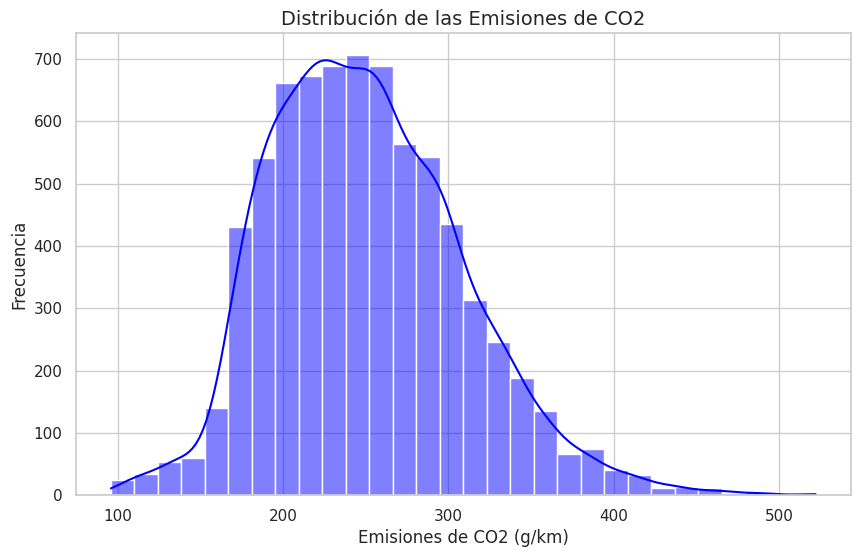

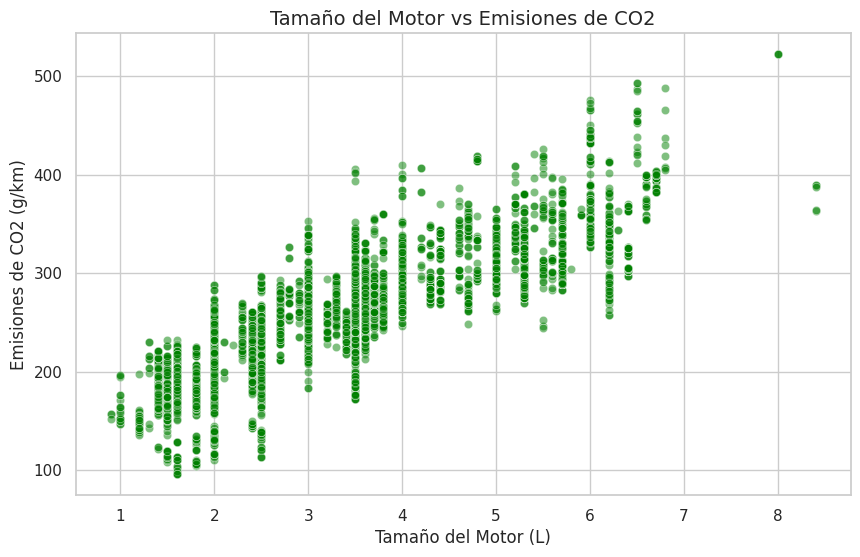

<ipython-input-1-0d2aea8444e4>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)', data=data, palette="muted")


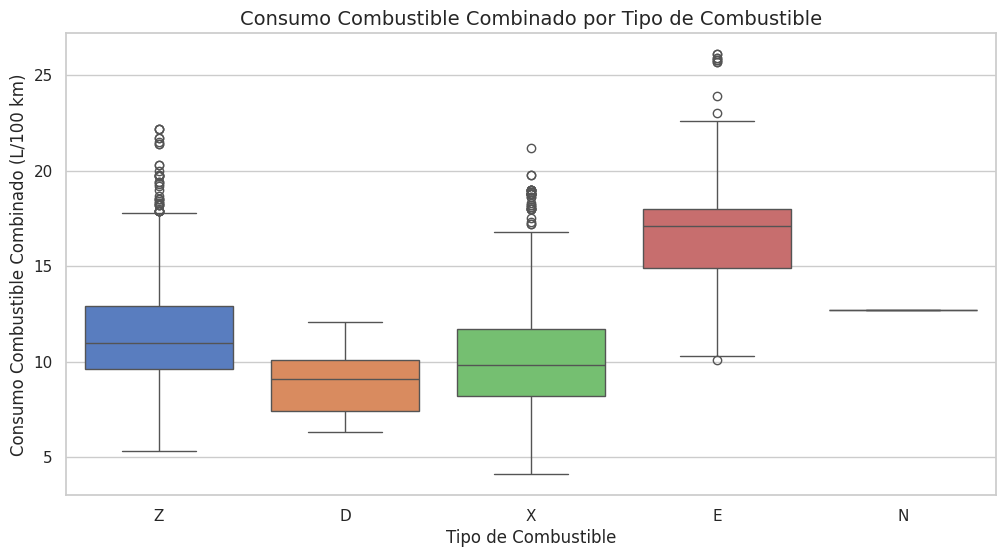

In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general para los gráficos
sns.set(style="whitegrid")

# URL del archivo CSV
url = "https://github.com/PedroGonzalezBeermann2020/datasets/raw/main/co2.csv"

# Descargar el archivo CSV desde el enlace
response = requests.get(url)
file_name = "co2.csv"

# Guardar el archivo CSV localmente
with open(file_name, 'wb') as file:
    file.write(response.content)

# Cargar el archivo CSV en un DataFrame de pandas
data = pd.read_csv(file_name)

# Inspección inicial
print("Primeras filas del conjunto de datos:")
print(data.head())

# Análisis cualitativo con gráficos
# 1. Distribución de las emisiones de CO2
plt.figure(figsize=(10, 6))
sns.histplot(data['CO2 Emissions(g/km)'], bins=30, kde=True, color="blue")
plt.title("Distribución de las Emisiones de CO2", fontsize=14)
plt.xlabel("Emisiones de CO2 (g/km)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()

# 2. Relación entre tamaño del motor y emisiones
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Engine Size(L)'], y=data['CO2 Emissions(g/km)'], alpha=0.5, color="green")
plt.title("Tamaño del Motor vs Emisiones de CO2", fontsize=14)
plt.xlabel("Tamaño del Motor (L)", fontsize=12)
plt.ylabel("Emisiones de CO2 (g/km)", fontsize=12)
plt.show()

# 3. Comparación del consumo combinado entre tipos de combustible
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fuel Type', y='Fuel Consumption Comb (L/100 km)', data=data, palette="muted")
plt.title("Consumo Combustible Combinado por Tipo de Combustible", fontsize=14)
plt.xlabel("Tipo de Combustible", fontsize=12)
plt.ylabel("Consumo Combustible Combinado (L/100 km)", fontsize=12)
plt.show()

# **Problema 2**

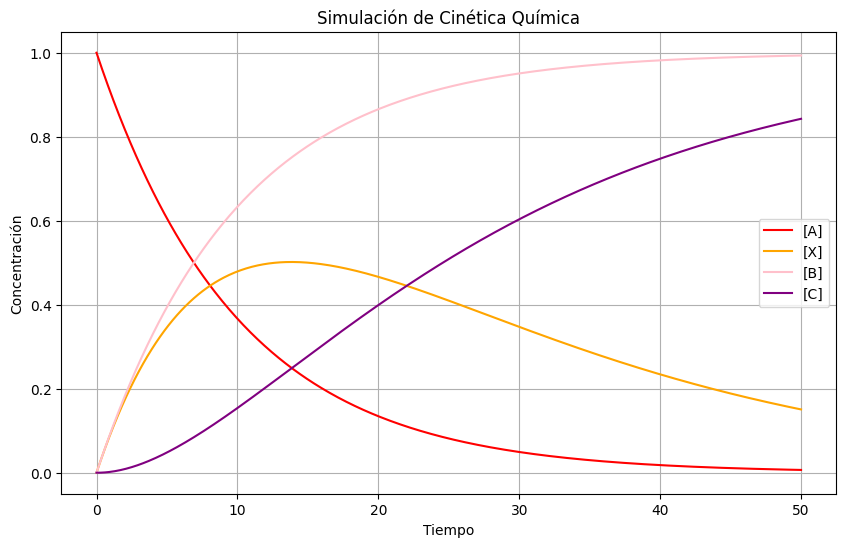

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes de velocidad
k1 = 0.1  # Constante de velocidad de A -> X + B
k2 = 0.05  # Constante de velocidad de X -> C

# Condiciones iniciales
A0 = 1.0  # Concentración inicial de A
X0 = 0.0  # Concentración inicial de X
B0 = 0.0  # Concentración inicial de B
C0 = 0.0  # Concentración inicial de C


t_max = 50  # Tiempo máximo
dt = 0.1  # Paso de tiempo
n_steps = int(t_max / dt)  # Número de pasos de tiempo


A = np.zeros(n_steps)
X = np.zeros(n_steps)
B = np.zeros(n_steps)
C = np.zeros(n_steps)
time = np.linspace(0, t_max, n_steps)

# Inicialización de concentraciones
A[0] = A0
X[0] = X0
B[0] = B0
C[0] = C0

# Bucle para resolver las ecuaciones diferenciales usando el método de Euler
for i in range(1, n_steps):
    dA = -k1 * A[i-1] * dt
    dX = (k1 * A[i-1] - k2 * X[i-1]) * dt
    dB = k1 * A[i-1] * dt
    dC = k2 * X[i-1] * dt

    A[i] = A[i-1] + dA
    X[i] = X[i-1] + dX
    B[i] = B[i-1] + dB
    C[i] = C[i-1] + dC

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(time, A, label='[A]', color='red')
plt.plot(time, X, label='[X]', color='orange')
plt.plot(time, B, label='[B]', color='pink')
plt.plot(time, C, label='[C]', color='purple')
plt.xlabel('Tiempo')
plt.ylabel('Concentración')
plt.title('Simulación de Cinética Química')
plt.legend()
plt.grid()
plt.show()


# ***`Problema 5`***

In [ ]:
# Programa para analizar resultados de uroanálisis de 5 pacientes
# Parámetros y rangos normales

# Función para clasificar los valores
def clasificar_parametro(valor, bajo, alto):
    if valor < bajo:
        return "Bajo"
    elif valor > alto:
        return "Alto"
    else:
        return "Normal"

# Rangos normales para cada parámetro
rangos = {
    "pH": (4.5, 8.0),
    "Densidad": (1.005, 1.030),
    "Proteínas": (0, 10),
    "Glucosa": (0, 15),
    "Cuerpos cetónicos": (0, 5),
    "Bilirrubina": (0, 0),
    "Urobilinógeno": (0.1, 1.0),
    "Hemoglobina": (0, 0.03),
}

# Datos de 5 pacientes (diccionario de listas)
pacientes = {
    "Paciente 1": {"pH": 5.5, "Densidad": 1.010, "Proteínas": 8, "Glucosa": 5, "Cuerpos cetónicos": 2, "Bilirrubina": 0, "Urobilinógeno": 0.5, "Hemoglobina": 0.01},
    "Paciente 2": {"pH": 4.0, "Densidad": 1.035, "Proteínas": 20, "Glucosa": 30, "Cuerpos cetónicos": 6, "Bilirrubina": 1, "Urobilinógeno": 1.2, "Hemoglobina": 0.05},
    "Paciente 3": {"pH": 6.0, "Densidad": 1.025, "Proteínas": 0, "Glucosa": 0, "Cuerpos cetónicos": 0, "Bilirrubina": 0, "Urobilinógeno": 0.7, "Hemoglobina": 0.02},
    "Paciente 4": {"pH": 8.5, "Densidad": 1.000, "Proteínas": 15, "Glucosa": 12, "Cuerpos cetónicos": 3, "Bilirrubina": 0, "Urobilinógeno": 0.3, "Hemoglobina": 0.04},
    "Paciente 5": {"pH": 7.0, "Densidad": 1.015, "Proteínas": 5, "Glucosa": 10, "Cuerpos cetónicos": 1, "Bilirrubina": 0, "Urobilinógeno": 0.9, "Hemoglobina": 0.01},
}

# Evaluar y clasificar resultados
print("Resultados del Uroanálisis y Clasificación:")
print("-" * 70)

for paciente, valores in pacientes.items():
    print(f"\n{paciente}:")
    for parametro, valor in valores.items():
        bajo, alto = rangos[parametro]
        clasificacion = clasificar_parametro(valor, bajo, alto)
        print(f"  {parametro}: {valor} ({clasificacion})")

print("\n" + "-" * 70)



Resultados del Uroanálisis y Clasificación:
----------------------------------------------------------------------

Paciente 1:
  pH: 5.5 (Normal)
  Densidad: 1.01 (Normal)
  Proteínas: 8 (Normal)
  Glucosa: 5 (Normal)
  Cuerpos cetónicos: 2 (Normal)
  Bilirrubina: 0 (Normal)
  Urobilinógeno: 0.5 (Normal)
  Hemoglobina: 0.01 (Normal)

Paciente 2:
  pH: 4.0 (Bajo)
  Densidad: 1.035 (Alto)
  Proteínas: 20 (Alto)
  Glucosa: 30 (Alto)
  Cuerpos cetónicos: 6 (Alto)
  Bilirrubina: 1 (Alto)
  Urobilinógeno: 1.2 (Alto)
  Hemoglobina: 0.05 (Alto)

Paciente 3:
  pH: 6.0 (Normal)
  Densidad: 1.025 (Normal)
  Proteínas: 0 (Normal)
  Glucosa: 0 (Normal)
  Cuerpos cetónicos: 0 (Normal)
  Bilirrubina: 0 (Normal)
  Urobilinógeno: 0.7 (Normal)
  Hemoglobina: 0.02 (Normal)

Paciente 4:
  pH: 8.5 (Alto)
  Densidad: 1.0 (Bajo)
  Proteínas: 15 (Alto)
  Glucosa: 12 (Normal)
  Cuerpos cetónicos: 3 (Normal)
  Bilirrubina: 0 (Normal)
  Urobilinógeno: 0.3 (Normal)
  Hemoglobina: 0.04 (Alto)

Paciente 5:
  pH: 7